In [21]:
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import scipy

dataset_chromecast = pd.read_csv('dataset_chromecast.csv')
dataset_smarttv = pd.read_csv('dataset_smart-tv.csv')

dataset_chromecast['hour'] = dataset_chromecast['date_hour'].apply(lambda x: int(x.split(" ")[1].split(":")[0]))
dataset_chromecast['bytes_up'] = dataset_chromecast['bytes_up'].apply(lambda x: math.log(x, 10) if x != 0 else 0)
dataset_chromecast['bytes_down'] = dataset_chromecast['bytes_down'].apply(lambda x: math.log(x, 10) if x != 0 else 0)
dataset_smarttv['hour'] = dataset_smarttv['date_hour'].apply(lambda x: int(x.split(" ")[1].split(":")[0]))
dataset_smarttv['bytes_up'] = dataset_smarttv['bytes_up'].apply(lambda x: math.log(x, 10) if x != 0 else 0)
dataset_smarttv['bytes_down'] = dataset_smarttv['bytes_down'].apply(lambda x: math.log(x, 10) if x != 0 else 0)

Text(0.5, 0, 'Hora')

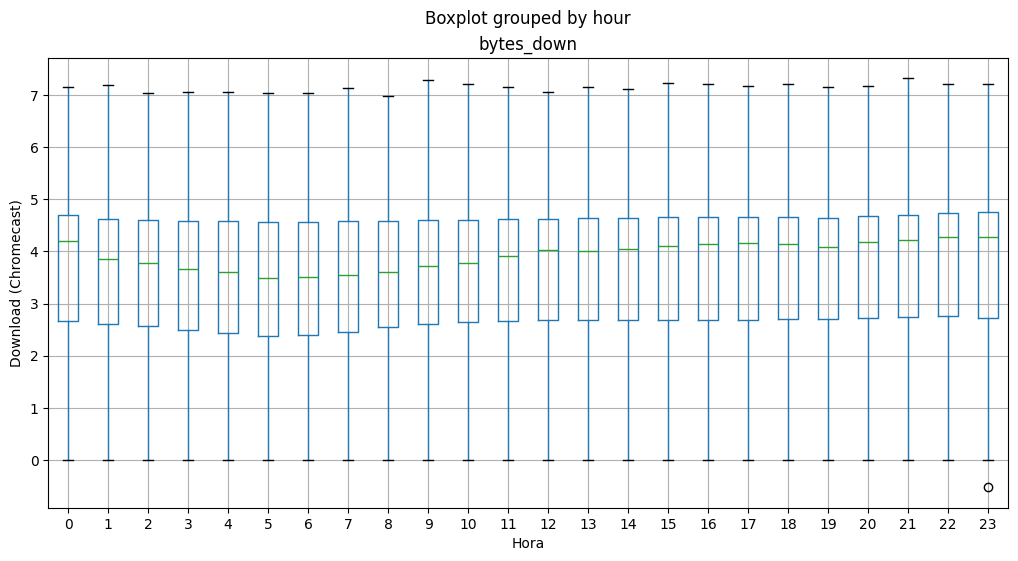

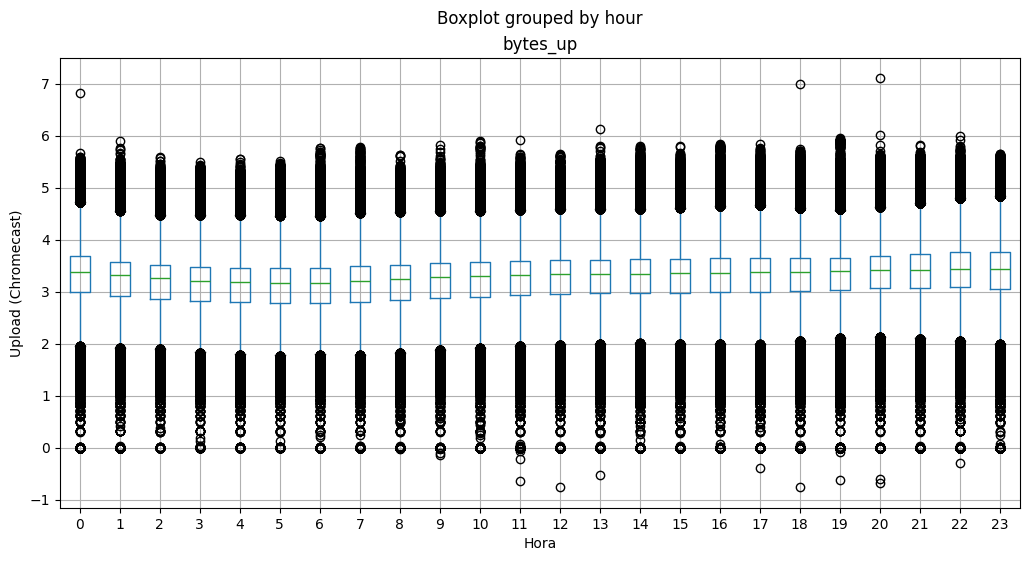

In [22]:
fig, ax = plt.subplots(figsize=(12,6))

boxplot = dataset_chromecast.boxplot(column="bytes_down", by="hour", ax=ax)

plt.ylabel("Download (Chromecast)")
plt.xlabel("Hora")

fig, ax = plt.subplots(figsize=(12,6))

boxplot = dataset_chromecast.boxplot(column="bytes_up", by="hour", ax=ax)

plt.ylabel("Upload (Chromecast)")
plt.xlabel("Hora")

Text(0.5, 0, 'Hora')

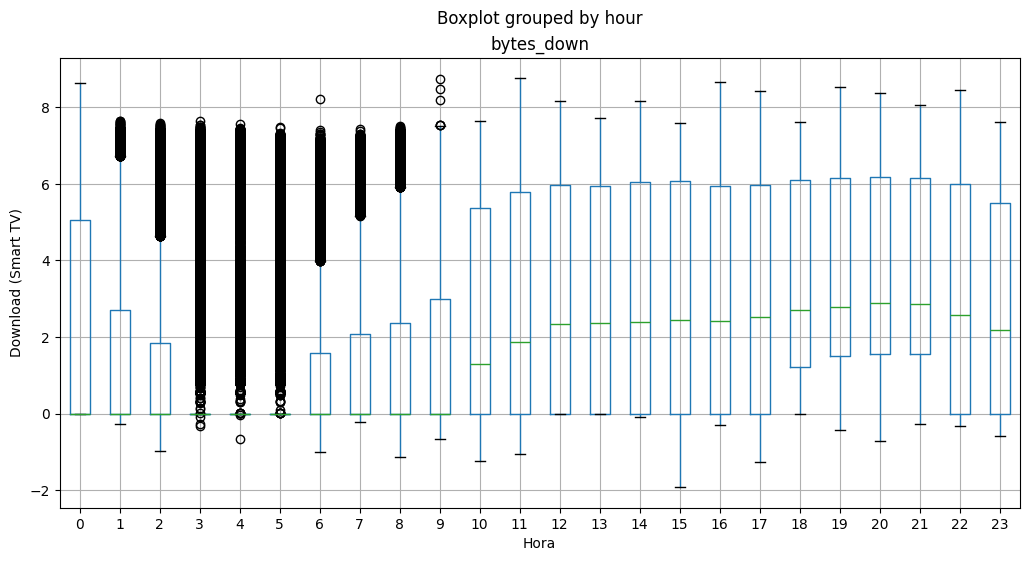

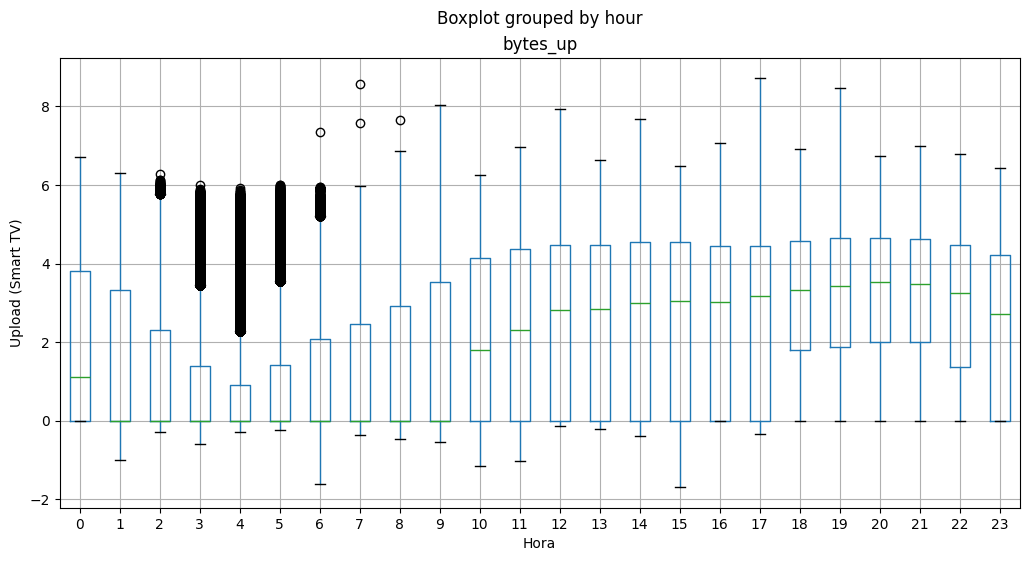

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

boxplot = dataset_smarttv.boxplot(column="bytes_down", by="hour", ax=ax)

plt.ylabel("Download (Smart TV)")
plt.xlabel("Hora")

fig, ax = plt.subplots(figsize=(12,6))

boxplot = dataset_smarttv.boxplot(column="bytes_up", by="hour", ax=ax)

plt.ylabel("Upload (Smart TV)")
plt.xlabel("Hora")

In [24]:
print("Média por Hora")
mean_down_chromecast = dataset_chromecast.groupby('hour')['bytes_down'].mean()
print("Download (Chromecast): ", mean_down_chromecast)
print("Max Download (Chromecast): ", max(mean_down_chromecast))
mean_up_chromecast = dataset_chromecast.groupby('hour')['bytes_up'].mean()
print("Upload (Chromecast): ", mean_up_chromecast)
print("Max Upload (Chromecast): ", max(mean_up_chromecast))
mean_down_smarttv = dataset_smarttv.groupby('hour')['bytes_down'].mean()
print("Download (Smart TV): ", mean_down_smarttv)
print("Max Download (Smart TV): ", max(mean_down_smarttv))
mean_up_smarttv = dataset_smarttv.groupby('hour')['bytes_up'].mean()
print("Upload (Smart TV): ", mean_up_smarttv)
print("Max Upload (Smart TV): ", max(mean_up_smarttv))

Média por Hora
Download (Chromecast):  hour
0     3.952172
1     3.775061
2     3.684862
3     3.635835
4     3.617389
5     3.570148
6     3.564832
7     3.615184
8     3.652186
9     3.696015
10    3.706878
11    3.740997
12    3.777812
13    3.784771
14    3.797197
15    3.832234
16    3.864858
17    3.878854
18    3.857126
19    3.851931
20    3.921646
21    3.967232
22    4.035682
23    4.052065
Name: bytes_down, dtype: float64
Max Download (Chromecast):  4.05206534060822
Upload (Chromecast):  hour
0     3.431615
1     3.321561
2     3.242505
3     3.201310
4     3.177515
5     3.158313
6     3.156165
7     3.200172
8     3.241260
9     3.285574
10    3.296923
11    3.320794
12    3.347651
13    3.354190
14    3.362201
15    3.380304
16    3.398751
17    3.406945
18    3.400500
19    3.417056
20    3.467860
21    3.493399
22    3.521018
23    3.507132
Name: bytes_up, dtype: float64
Max Upload (Chromecast):  3.521018359629227
Download (Smart TV):  hour
0     2.103765
1     1.600724

In [25]:
print("Variância por Hora")
var_down_chromecast = dataset_chromecast.groupby('hour')['bytes_down'].var()
print("Download (Chromecast): ", var_down_chromecast)
var_up_chromecast = dataset_chromecast.groupby('hour')['bytes_up'].var()
print("Upload (Chromecast): ", var_up_chromecast)
var_down_smarttv = dataset_smarttv.groupby('hour')['bytes_down'].var()
print("Download (Smart TV): ", var_down_smarttv)
var_up_smarttv = dataset_smarttv.groupby('hour')['bytes_up'].var()
print("Upload (Smart TV): ", var_up_smarttv)


Variância por Hora
Download (Chromecast):  hour
0     2.066892
1     1.743643
2     1.459610
3     1.409667
4     1.416249
5     1.378992
6     1.373182
7     1.428782
8     1.489059
9     1.511496
10    1.520994
11    1.516548
12    1.539571
13    1.590885
14    1.583560
15    1.625532
16    1.711384
17    1.731890
18    1.663101
19    1.661719
20    1.752487
21    1.863405
22    1.971348
23    2.161618
Name: bytes_down, dtype: float64
Upload (Chromecast):  hour
0     0.632975
1     0.483844
2     0.343053
3     0.309149
4     0.316611
5     0.292710
6     0.305329
7     0.339260
8     0.391376
9     0.398831
10    0.408796
11    0.409178
12    0.406391
13    0.430432
14    0.426601
15    0.436694
16    0.479729
17    0.497589
18    0.476417
19    0.485855
20    0.495271
21    0.544971
22    0.597295
23    0.694916
Name: bytes_up, dtype: float64
Download (Smart TV):  hour
0     6.889178
1     6.051902
2     4.956280
3     3.626839
4     2.886015
5     3.521181
6     3.998791
7     4.4

In [26]:
print("Desvio Padrão por Hora")
std_down_chromecast = dataset_chromecast.groupby('hour')['bytes_down'].std()
print("Download (Chromecast): ", std_down_chromecast)
std_up_chromecast = dataset_chromecast.groupby('hour')['bytes_up'].std()
print("Upload (Chromecast): ", std_up_chromecast)
std_down_smarttv = dataset_smarttv.groupby('hour')['bytes_down'].std()
print("Download (Smart TV): ", std_down_smarttv)
std_up_smarttv = dataset_smarttv.groupby('hour')['bytes_up'].std()
print("Upload (Smart TV): ", std_up_smarttv)

Desvio Padrão por Hora
Download (Chromecast):  hour
0     1.437669
1     1.320471
2     1.208143
3     1.187294
4     1.190062
5     1.174305
6     1.171829
7     1.195317
8     1.220270
9     1.229429
10    1.233286
11    1.231482
12    1.240794
13    1.261303
14    1.258396
15    1.274963
16    1.308199
17    1.316013
18    1.289613
19    1.289077
20    1.323815
21    1.365066
22    1.404047
23    1.470244
Name: bytes_down, dtype: float64
Upload (Chromecast):  hour
0     0.795598
1     0.695589
2     0.585707
3     0.556011
4     0.562682
5     0.541027
6     0.552566
7     0.582460
8     0.625601
9     0.631530
10    0.639372
11    0.639671
12    0.637488
13    0.656073
14    0.653147
15    0.660828
16    0.692625
17    0.705400
18    0.690230
19    0.697033
20    0.703755
21    0.738222
22    0.772848
23    0.833616
Name: bytes_up, dtype: float64
Download (Smart TV):  hour
0     2.624724
1     2.460061
2     2.226270
3     1.904426
4     1.698828
5     1.876481
6     1.999698
7    

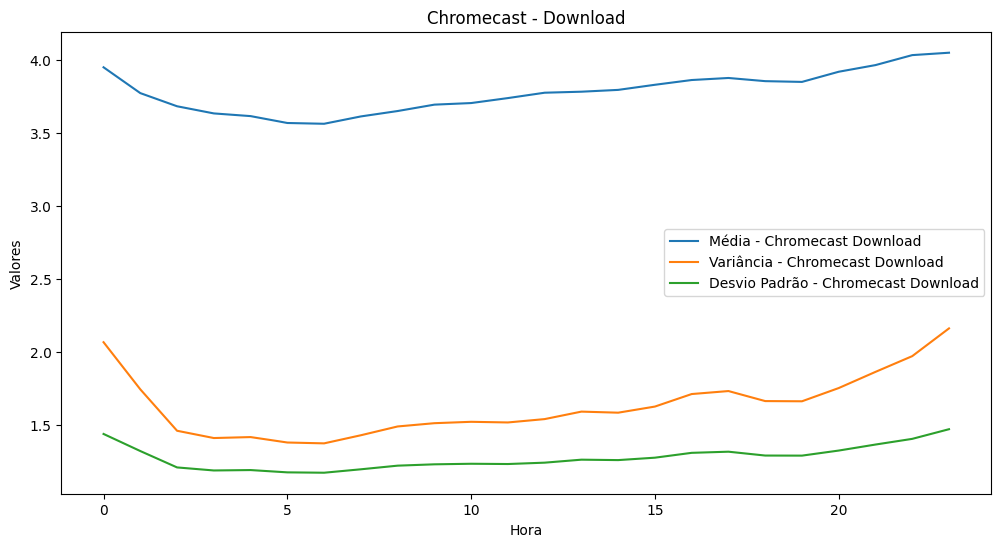

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(dataset_chromecast.groupby('hour')['bytes_down'].mean(), label="Média - Chromecast Download")
plt.plot(dataset_chromecast.groupby('hour')['bytes_down'].var(), label="Variância - Chromecast Download")
plt.plot(dataset_chromecast.groupby('hour')['bytes_down'].std(), label="Desvio Padrão - Chromecast Download")
plt.title('Chromecast - Download')
plt.xlabel('Hora')
plt.ylabel('Valores')
plt.legend()

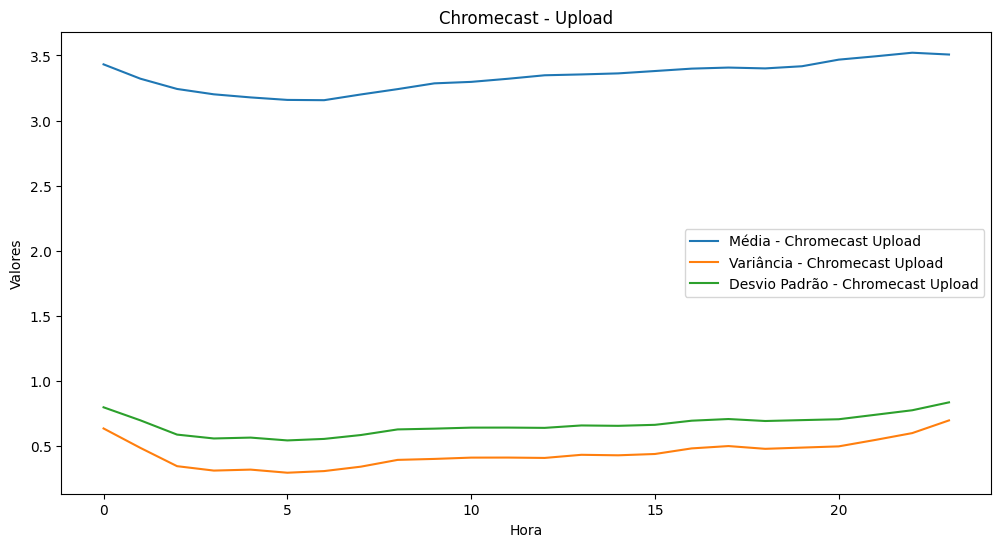

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(dataset_chromecast.groupby('hour')['bytes_up'].mean(), label="Média - Chromecast Upload")
plt.plot(dataset_chromecast.groupby('hour')['bytes_up'].var(), label="Variância - Chromecast Upload")
plt.plot(dataset_chromecast.groupby('hour')['bytes_up'].std(), label="Desvio Padrão - Chromecast Upload")
plt.title('Chromecast - Upload')
plt.xlabel('Hora')
plt.ylabel('Valores')
plt.legend()

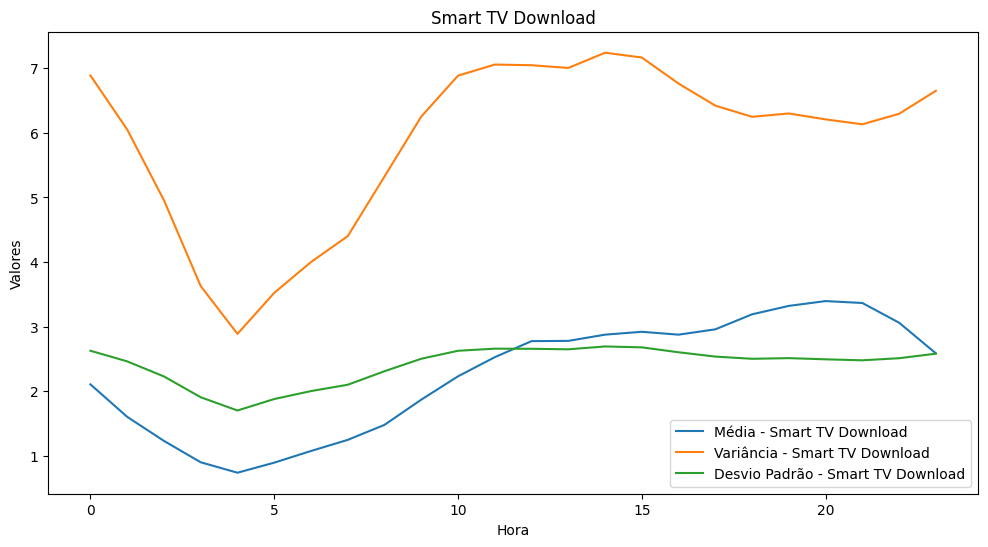

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(dataset_smarttv.groupby('hour')['bytes_down'].mean(), label="Média - Smart TV Download")
plt.plot(dataset_smarttv.groupby('hour')['bytes_down'].var(), label="Variância - Smart TV Download")
plt.plot(dataset_smarttv.groupby('hour')['bytes_down'].std(), label="Desvio Padrão - Smart TV Download")
plt.title('Smart TV Download')
plt.xlabel('Hora')
plt.ylabel('Valores')
plt.legend()

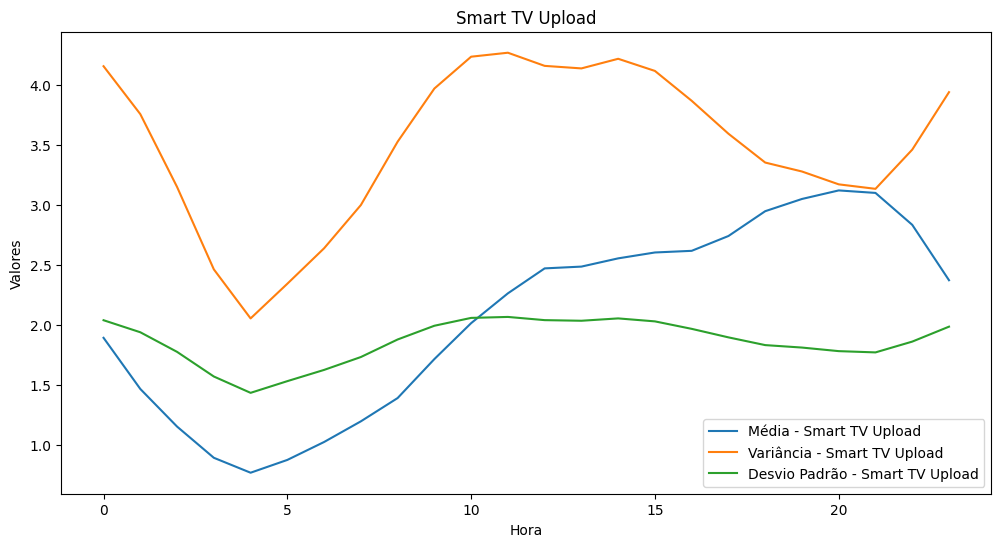

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(dataset_smarttv.groupby('hour')['bytes_up'].mean(), label="Média - Smart TV Upload")
plt.plot(dataset_smarttv.groupby('hour')['bytes_up'].var(), label="Variância - Smart TV Upload")
plt.plot(dataset_smarttv.groupby('hour')['bytes_up'].std(), label="Desvio Padrão - Smart TV Upload")
plt.title('Smart TV Upload')
plt.xlabel('Hora')
plt.ylabel('Valores')
plt.legend()